In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [28]:
df=pd.read_csv('placement.csv.xls')
print(df)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]


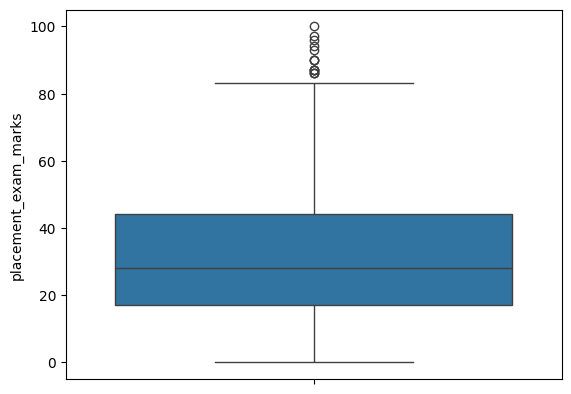

In [49]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

In [31]:
#finding iqr
Q1=df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
print(Q3, Q1)
IQR=Q3-Q1
print(IQR)

44.0 17.0
27.0


In [33]:
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR
print(ul,ll)

84.5 -23.5


In [34]:
#Finding Outliers
df[df['placement_exam_marks'] > ul]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [37]:
# Trimming

new_df = df[df['placement_exam_marks'] < ul]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [38]:
# Capping

new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > ul,
    ul,
    np.where(
        new_df_cap['placement_exam_marks'] < ll,
        ll,
        new_df_cap['placement_exam_marks']
    )

)
new_df_cap.shape

(1000, 3)

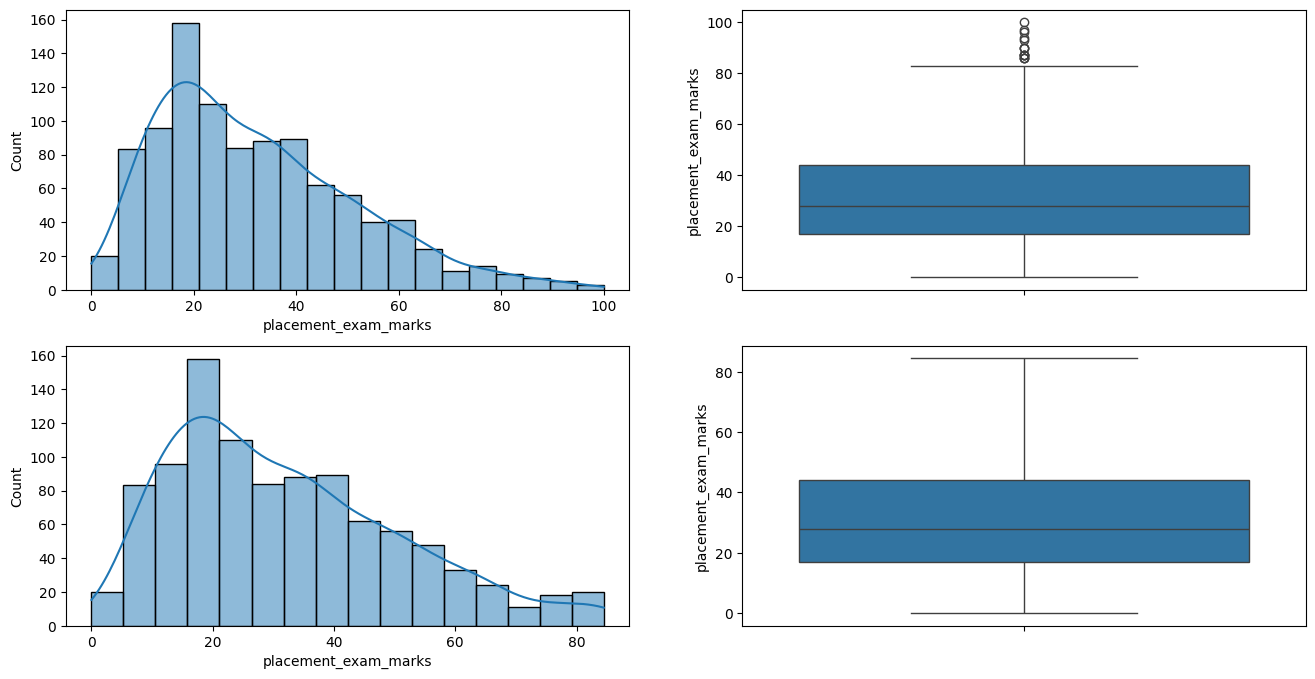

In [48]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.xticks(rotation=90)
plt.show()

In [50]:
df=pd.read_csv("weight-height.csv")
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


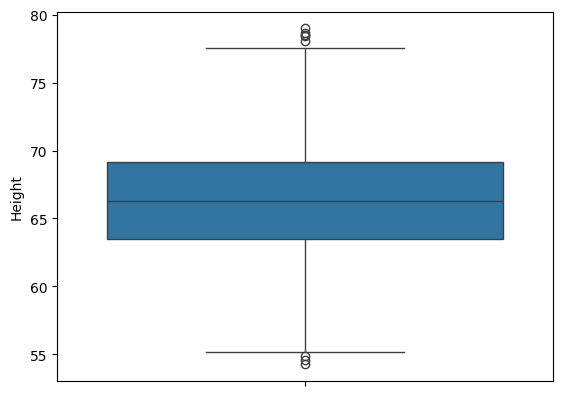

In [61]:
sns.boxplot(df["Height"])
plt.show()

In [52]:
#capping
q3=df["Height"].quantile(0.99)
q1=df["Height"].quantile(0.01)
print(q1,q3)

58.13441158671655 74.7857900583366


In [59]:
#trapping
ul=q3
ll=q1
print(ul,ll)

74.7857900583366 58.13441158671655


In [60]:
newdf=df[(df["Height"]<=ul) & (df["Height"]>=ll)]
print(newdf)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9800 rows x 3 columns]
